### Nayan Telrandhe<br>
nayantelrandhe150@gmail.com


## Problem Statement

Krittika's Python tutorial notebooks: https://github.com/krittikaiitb/tutorials <br><br>
A Cepheid variable is a type of star that, due to some inherent instability, pulsates radially, varying in both diameter and temperature and producing **changes in brightness with a well-defined stable period and amplitude**. As it turns out, the **period** of pulsation and the **Luminosity (i.e the absolute magnitude)** of the Cephied are related. <br><br>
We'll use data of cepheids from the Small Magallenic Cloud (SMC) obtained by a survey called Optical Gravitational Lensing Experiment (OGLE).The Small Magellanic Cloud is a dwarf galaxy satellite of the Milky Way, and **distances to any star** in it can be assumed to be **almost constant**. So the magnitudes (can be) translated directly into absolute magnitudes with **some offset** dependent on the distance to the SMC!

### Data Cleaning

The data file given consists of 'ID', the identifier for the star; 'RA', the right ascension in HMS format; 'Decl', the declination in DMS format; 'I' , the I band magnitude; 'V', the V band magnitude; 'P_1', the period. <br><br>
Some entries in the V and I band magnitude have a value of **-99.990**, so we **do not want to use these** stars for further analysis. Remove such entries. Further, convert the **RA and Dec values to degrees from HMS and DMS** respectively. You might find Pandas convenient for the above purposes.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
#Importing the data
D=pd.read_csv('CepheidData.csv')

#Removing data points with V and I band mag of -99.990
D=D[D.V!=-99.990]
D=D[D.I!=-99.990]

#Resetting the explicit index
D.reset_index(inplace = True)
Data=D

#Converting RA and DEC values to Degrees
for n in range(0,len(D['RA'])):
    a=D['RA'][n].split(':')
    a=(360/24)*(int(a[0]) + int(a[1])/60 + float(a[2])/3600)
    D['RA'][n]=a
    
for n in range(0,len(D['Decl'])):
    a=D['Decl'][n].split(':')
    a=int(a[0])-(int(a[1])/60)-float(a[2])/3600
    D['Decl'][n]=a
#D

Plot the RA, Dec coordinates in a sky grid using Matplotlib. (Hint: Look up Mollweide projections in Matplotlib)

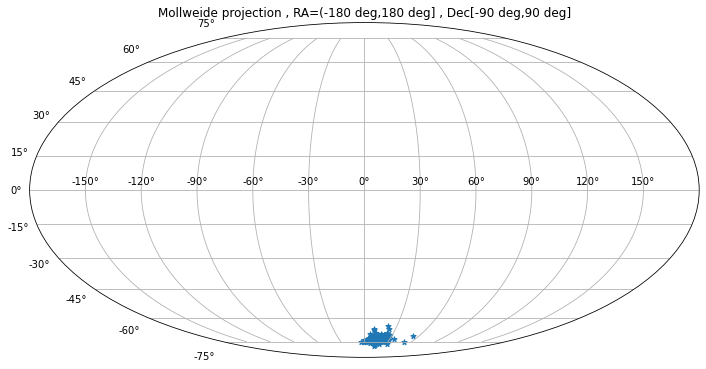

In [3]:
#Mollweide Projection Plot of the data

## Converting RA and Dec to projection coordinates
RA=np.array(D['RA'])*(2*np.pi/360)
Dec=np.array(D['Decl'])*(2*np.pi/360)
for n in range (0,RA.shape[0]):
    if RA[n]>np.pi:
        RA[n]=RA[n]-(2*np.pi)

plt.figure(figsize=(12, 10))
plt.subplot(111, projection="mollweide")
plt.title("Mollweide projection , RA=(-180 deg,180 deg] , Dec[-90 deg,90 deg]")
plt.scatter(RA,Dec, marker = '*', s = 30)
plt.grid(True)
plt.show()

### P-L Diagrams

Plot the Magnitude vs log(Period) for V and I bands. Observe that a linear fit can be done to obtain the period magnitude relation for each band separately. Use scipy's curve fit module to obtain the relation for both V and I band. The P-L relation is of the form <br><br>
$m_{\lambda} = a_{\lambda}log(P) + I_{\lambda}$ <br><br>
where $m_{\lambda}$ is the apparent magnitude, $a_{\lambda}$ is the slope, P is period and $I_{\lambda}$ is the intercept

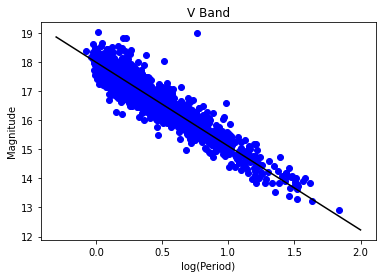

apparent magnitude =  -2.879410140525388 ,intercept =  17.985377842204056


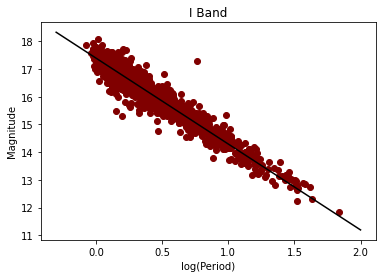

apparent magnitude =  -3.09779700713138 ,intercept =  17.392207055477677


In [4]:
#Curve fitting

### Magnitude function
### Assuming the log_base is 10
def f(p,a,b):
    return (a*np.log10(p))+b

Band=['V','I']
G=[]
Color=['blue','maroon']
for i in range(0,2):
    p=D['P_1']
    m=D[Band[i]]
    (a,b),pc = curve_fit(f, p, m)
    G=G+[a,b]
    X=np.linspace(0.5,100,100)
    Y=f(X,a,b)
    plt.scatter(np.log10(D['P_1']),D[Band[i]],color=Color[i])
    plt.title(str(Band[i]+' Band'))
    plt.xlabel('log(Period)')
    plt.ylabel('Magnitude')
    plt.plot(np.log10(X),Y,'black')
    plt.show()
    print('apparent magnitude = ',a,',intercept = ',b)

### Deviation

From the P-L diagrams, you can observe that there are quite a few stars that deviate from the linear fit, in both bands. A naive attempt at quantifying the deviation from the P-L relation would be by **splitting the region** the cepheids are contained in **into multiple patches** and **calculating the fit parameters in each patch**. Assume that the **change in slope value is negligible**. This leaves **only the intercept**, implying that the new fit is a **vertical offset** from the **global fit done earlier**. <br><br>

Divide the SMC region into 25 patches. You can do this by simply partitioning the RA and Dec ranges into 5 parts each. Each patch would look somewhat similar to the reference image below (not related to SMC data). Make sure that you do not include outliers while partitioning RA and Dec. **Quantiles** can be used to change the range containing 5% to 95% of all entries. <br><br>

![Sky Grid](Sky_Grid.png)

Write a function to perform a linear fit to both V and I bands in each patch and return the intercept values. We calculate the deviation as <br><br>

$D_{V-I} = (GI_V - I_V) - (GI_I - I_I)$ <br><br>

where GI is the Grid Intercept (intercept values in each grid) and I is the intercept (global intercept from the previous part). The bands are in given in the subscripts. You will obtain 25 values of $D_{V-I}$, one for each patch. Plot a histogram of these values.

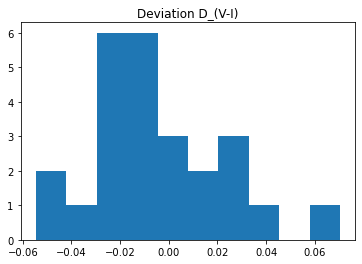

In [5]:
#Splitting data into 25 regions using RA and DEC values

# Adding Projection coordinates in the dataframe for further convinience
D['RA_rad'] = RA.tolist()
D['Dec_rad'] = Dec.tolist()

### Finding quantile values corresponding to RA and Dec
RA=np.linspace(np.quantile(RA,0.05),np.quantile(RA,0.95),6)
Dec=np.linspace(np.quantile(Dec,0.05),np.quantile(Dec,0.95),6)

### Filtering the data based on quantiles
D=D[D.RA_rad>=np.quantile(RA,0.05)]
D=D[D.RA_rad<=np.quantile(RA,0.95)]
D=D[D.Dec_rad>=np.quantile(Dec,0.05)]
D=D[D.Dec_rad<=np.quantile(Dec,0.95)]

### Grouping data into 25 sets based on quantiles (gives list of 25 dataframes as output)
L=[]
for r in range(0,5):
    a=D[D.RA_rad>=RA[r]]
    a=a[a.RA_rad<RA[r+1]]
    for d in range(0,5):
        b=a[a.Dec_rad>=Dec[d]]
        b=b[b.Dec_rad<Dec[d+1]]
        L=L+[b]

#Function to curve fit for V and I bands in a dataframe giving intercept values as output
def Cfit(l,m1,m2):
    O=[]  
    #V
    def f(p,y):
        return (m1*np.log10(p))+y
    p=l['P_1']
    m=l['V']
    i,pci = curve_fit(f, p, m)
    O=O+[i]
    #I
    def f(p,y):
        return (m2*np.log10(p))+y
    p=l['P_1']
    m=l['I']
    j,pcj = curve_fit(f, p, m)
    return (float(i),float(j))

#Keeping slope constant making a list of intercept values for data in 25 regions
Ii=[]
for l in L:
    z=Cfit(l,G[0],G[2])
    Ii=Ii+[z]

#Calculating Deviation for each region
Di=[]
for i in range(0,25):
    Di=Di+[float((-G[1]+Ii[i][0])-(-G[3]+Ii[i][1]))]

#Histogram of values of Deviation
plt.hist(Di)
plt.title("Deviation D_(V-I)")
plt.show()

### Wesenheit Index

Deviations from P-L relation may occur due to a phenomena called interstellar extinction. The Wesenheit Index, defined as `W = I - 1.55(V - I)` automatically takes care of extinction. Show a plot of W vs log(P) for the given data.

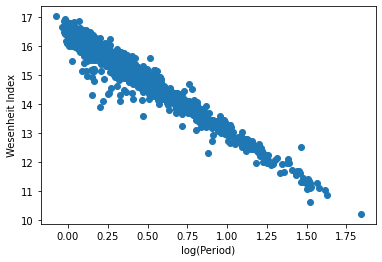

In [6]:
#Calculating Wesenheit Index for data points (Data plotted is the one before filtering based on quantiles)

W=Data['I']-1.55*(Data['V']-Data['I'])
plt.scatter(np.log10(Data['P_1']),W)
#plt.title('Wesenheit Index')
plt.xlabel('log(Period)')
plt.ylabel('Wesenheit Index')
plt.show()


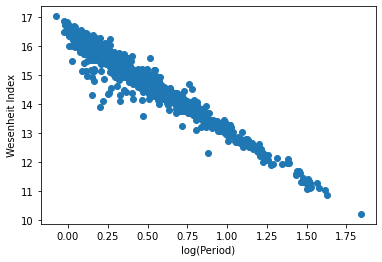

In [7]:
#Calculating Wesenheit Index for data points (Data plotted is the one after filtering based on quantiles)

W=D['I']-1.55*(D['V']-D['I'])
plt.scatter(np.log10(D['P_1']),W)
#plt.title('Wesenheit Index')
plt.xlabel('log(Period)')
plt.ylabel('Wesenheit Index')
plt.show()

### Hints and References:

Magnitude system: [Wikipedia](https://en.wikipedia.org/wiki/Magnitude_(astronomy%29) <br>
Pandas: [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)<br>
Interstellar Extinction: [Wikipedia](https://en.wikipedia.org/wiki/Extinction_(astronomy%29)